In [36]:
# Import required libraries
import pandas as pd
import numpy as np
import hvplot.pandas
from pathlib import Path
import matplotlib.pyplot as plt

# Setting these options will allow for reviewing more of the DataFrames
pd.set_option("display.max_rows", 2000)
pd.set_option("display.max_columns", 2000)
pd.set_option("display.width", 1000)

In [2]:
#Read in Bitcoin data
btc_dp = Path('C:/Users/Optiplex7040/Downloads/BTC_Project2/BTC-USD-2020-2024.csv')
btc_df = pd.read_csv(btc_dp, index_col='Date', parse_dates=True, infer_datetime_format = True)
btc_df.head()

C:\Users\Optiplex7040\AppData\Local\Temp\ipykernel_5368\4183534139.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  btc_df = pd.read_csv(btc_dp, index_col='Date', parse_dates=True, infer_datetime_format = True)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,1.856566e+10
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,2.080208e+10
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,2.811148e+10
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,1.844427e+10
2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,1.972507e+10


In [3]:
btc_df = btc_df.drop(columns=["Adj Close"])
btc_df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,1.856566e+10
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,2.080208e+10
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,2.811148e+10
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,1.844427e+10
2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,1.972507e+10


In [4]:
#Using HvPlot, display the dataframe
btc_df['Close'].hvplot()

:Curve   [Date]   (Close)

In [5]:
#Import finTA
from finta import TA

In [6]:
#Get the Bollinger Bands for the Dataset
btc_bands = TA.BBANDS(btc_df)

btc_bands.head()

,BB_UPPER,BB_MIDDLE,BB_LOWER
Date,,,
2020-01-01,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN
2020-01-04,NaN,NaN,NaN
2020-01-05,NaN,NaN,NaN


In [7]:
#Concat Bollinger Bands to the dataframe
btc_df = pd.concat([btc_df, btc_bands], axis=1)

btc_df.head()

,Open,High,Low,Close,Volume,BB_UPPER,BB_MIDDLE,BB_LOWER
Date,,,,,,,,
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,1.856566e+10,NaN,NaN,NaN
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,2.080208e+10,NaN,NaN,NaN
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,2.811148e+10,NaN,NaN,NaN
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,1.844427e+10,NaN,NaN,NaN
2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,1.972507e+10,NaN,NaN,NaN


In [8]:
# Visualize close price for the investment
security_close = btc_df[["Close"]].hvplot(
    line_color="lightgray",
    ylabel="Price in $",
    width=1000,
    height=400
)

bb_upper = btc_df[["BB_UPPER"]].hvplot(
    line_color="brown",
    ylabel="Price in $",
    width=1000,
    height=400
)


bb_middle = btc_df[["BB_MIDDLE"]].hvplot(
    line_color="blue",
    ylabel="Price in $",
    width=1000,
    height=400
)

bb_lower = btc_df[["BB_LOWER"]].hvplot(
    line_color="red",
    ylabel="Price in $",
    width=1000,
    height=400
)


# Overlay plots
btc_bands_plot = security_close * bb_upper * bb_middle * bb_lower
btc_bands_plot

:Overlay
   .Curve.I   :Curve   [Date]   (Close)
   .Curve.II  :Curve   [Date]   (BB_UPPER)
   .Curve.III :Curve   [Date]   (BB_MIDDLE)
   .Curve.IV  :Curve   [Date]   (BB_LOWER)

In [9]:
# Create a trading algorithm using Bollinger Bands
# Set the Signal column
btc_df["Signal"] = 0.0

# Generate the trading signals 1 (entry) or -1 (exit) for a long position trading algorithm
# where 1 is when the Close price is less than the BB_LOWER window
# where -1 is when the Close price is greater the the BB_UPPER window
for index, row in btc_df.iterrows():
    if row["Close"] < row["BB_LOWER"]:
        btc_df.loc[index, "Signal"] = 1.0
    if row["Close"] > row["BB_UPPER"]:
        btc_df.loc[index,"Signal"] = -1.0

# Review the DataFrame
btc_df.head()

,Open,High,Low,Close,Volume,BB_UPPER,BB_MIDDLE,BB_LOWER,Signal
Date,,,,,,,,,
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,1.856566e+10,NaN,NaN,NaN,0.0
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,2.080208e+10,NaN,NaN,NaN,0.0
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,2.811148e+10,NaN,NaN,NaN,0.0
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,1.844427e+10,NaN,NaN,NaN,0.0
2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,1.972507e+10,NaN,NaN,NaN,0.0


In [10]:
# Visualize close price for the investment
security_close = btc_df[["Close"]].hvplot(
    line_color="lightgray",
    ylabel="Price in $",
    width=1000,
    height=400
)

bb_upper = btc_df[["BB_UPPER"]].hvplot(
    line_color="brown",
    ylabel="Price in $",
    width=1000,
    height=400
)


bb_middle = btc_df[["BB_MIDDLE"]].hvplot(
    line_color="blue",
    ylabel="Price in $",
    width=1000,
    height=400
)

bb_lower = btc_df[["BB_LOWER"]].hvplot(
    line_color="red",
    ylabel="Price in $",
    width=1000,
    height=400
)

# Visualize entry and exit position relative to close price
entry = btc_df[btc_df["Signal"] == 1.0]["Close"].hvplot.scatter(
    color="yellow",
    marker="^",
    size=100,
    legend=False,
    ylabel="Price in $",
    width=1000,
    height=400
)


exit = btc_df[btc_df["Signal"] == -1.0]["Close"].hvplot.scatter(
    color="black",
    marker="v",
    size=100,
    legend=False,
    ylabel="Price in $",
    width=1000,
    height=400
)
 
# Overlay plots
btc_bands_plot= security_close * bb_upper * bb_middle * bb_lower * entry * exit
btc_bands_plot

:Overlay
   .Curve.I          :Curve   [Date]   (Close)
   .Curve.II         :Curve   [Date]   (BB_UPPER)
   .Curve.III        :Curve   [Date]   (BB_MIDDLE)
   .Curve.IV         :Curve   [Date]   (BB_LOWER)
   .Scatter.Close.I  :Scatter   [Date]   (Close)
   .Scatter.Close.II :Scatter   [Date]   (Close)

In [11]:
bbands_ml = btc_df.copy()

In [12]:
#Add daily returns with pct_change function
bbands_ml["Actual_returns"] = bbands_ml["Close"].pct_change()

bbands_ml.head()

C:\Users\Optiplex7040\AppData\Local\Temp\ipykernel_5368\3208378726.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  bbands_ml["Actual_returns"] = bbands_ml["Close"].pct_change()


,Open,High,Low,Close,Volume,BB_UPPER,BB_MIDDLE,BB_LOWER,Signal,Actual_returns
Date,,,,,,,,,,
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,1.856566e+10,NaN,NaN,NaN,0.0,NaN
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,2.080208e+10,NaN,NaN,NaN,0.0,-0.029819
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,2.811148e+10,NaN,NaN,NaN,0.0,0.051452
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,1.844427e+10,NaN,NaN,NaN,0.0,0.008955
2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,1.972507e+10,NaN,NaN,NaN,0.0,0.000089


In [13]:
bbands_ml = bbands_ml.dropna()

display(bbands_ml.head())
display(bbands_ml.tail())

,Open,High,Low,Close,Volume,BB_UPPER,BB_MIDDLE,BB_LOWER,Signal,Actual_returns
Date,,,,,,,,,,
2020-01-20,8704.631836,8745.590820,8560.473633,8657.642578,2.642238e+10,9353.612710,8118.971240,6884.329770,0.0,-0.005582
2020-01-21,8658.991211,8755.706055,8544.520508,8745.894531,2.409742e+10,9381.250734,8196.257251,7011.263768,0.0,0.010194
2020-01-22,8744.210938,8792.994141,8636.747070,8680.875977,2.260020e+10,9336.851030,8281.027539,7225.204048,0.0,-0.007434
2020-01-23,8680.650391,8687.747070,8333.637695,8406.515625,2.577068e+10,9294.170004,8334.109106,7374.048209,0.0,-0.031605
2020-01-24,8405.567383,8514.666992,8266.840820,8445.434570,2.439791e+10,9242.309043,8385.847998,7529.386953,0.0,0.004630


,Open,High,Low,Close,Volume,BB_UPPER,BB_MIDDLE,BB_LOWER,Signal,Actual_returns
Date,,,,,,,,,,
2024-03-07,66099.742188,68029.921875,65655.531250,66925.484375,4.698954e+10,70237.729128,57657.135156,45076.541185,0.0,0.012384
2024-03-08,66938.093750,70083.054688,66230.453125,68300.093750,5.920288e+10,71590.151907,58488.990039,45387.828172,0.0,0.020539
2024-03-09,68299.257813,68673.054688,68053.125000,68498.882813,2.160965e+10,72775.501021,59307.806836,45840.112651,0.0,0.002911
2024-03-10,68500.257813,70005.203125,68239.976563,69019.789063,3.568398e+10,73814.418385,60169.839063,46525.259741,0.0,0.007605
2024-03-11,69020.546875,72850.710938,67194.882813,72123.906250,6.571666e+10,75269.472699,61161.790625,47054.108551,0.0,0.044974


In [14]:
#Getting feats and target sets for ml
#Feature set
#create x features
X = bbands_ml[['Close', 'Actual_returns']].copy()
X.head()


,Close,Actual_returns
Date,,
2020-01-20,8657.642578,-0.005582
2020-01-21,8745.894531,0.010194
2020-01-22,8680.875977,-0.007434
2020-01-23,8406.515625,-0.031605
2020-01-24,8445.434570,0.004630


In [17]:
#Target set
 # Create a new column in the trading_df called signal setting its value to zero.
bbands_ml["signal"] = 0.0

# Create the signal to buy
bbands_ml.loc[(bbands_ml["Actual_returns"] >= 0), "signal"] = 1

# Create the signal to sell
bbands_ml.loc[(bbands_ml["Actual_returns"] < 0), "signal"] = -1

# Copy the new signal column to a new Series called y.
y = bbands_ml["signal"].copy()
y.head()

Date
2020-01-20   -1.0
2020-01-21    1.0
2020-01-22   -1.0
2020-01-23   -1.0
2020-01-24    1.0
Name: signal, dtype: float64

In [18]:
# Split data into training & testing sets
# Import required libraries
from pandas.tseries.offsets import DateOffset
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [19]:
# Select the start of the training period
training_begin = X.index.min()

# Display the training begin date
print(training_begin)

2020-01-20 00:00:00


In [20]:
 # Select the ending period for the training data with an offset of 3 months
training_end = X.index.min() + DateOffset(months=3)

# Display the training end date
print(training_end)

2020-04-20 00:00:00


In [21]:
# Generate the X_train and y_train DataFrames
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

# Display sample data
X_train.head()

,Close,Actual_returns
Date,,
2020-01-20,8657.642578,-0.005582
2020-01-21,8745.894531,0.010194
2020-01-22,8680.875977,-0.007434
2020-01-23,8406.515625,-0.031605
2020-01-24,8445.434570,0.004630


In [22]:
 # Generate the X_test and y_test DataFrames
X_test = X.loc[training_end:]
y_test = y.loc[training_end:]

# Display sample data
X_test.head()

,Close,Actual_returns
Date,,
2020-04-20,6881.958496,-0.042766
2020-04-21,6880.323242,-0.000238
2020-04-22,7117.207520,0.034429
2020-04-23,7429.724609,0.043910
2020-04-24,7550.900879,0.016310


In [23]:
# Create a StandardScaler instance
scaler = StandardScaler()
 
# Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)
 
# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [24]:
#Create a logisitc regression model
# Import LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression

In [25]:
# Create an instance of the LogisticRegression model
logistic_regression_model = LogisticRegression()

In [26]:
# Fit the LogisticRegression model
logistic_regression_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [27]:
# Use the trained LogisticRegression model to predict the trading signals for the training data
lr_training_signal_predictions = logistic_regression_model.predict(X_train_scaled)

# Display the predictions
lr_training_signal_predictions

array([-1.,  1., -1., -1.,  1., -1.,  1.,  1.,  1., -1.,  1., -1.,  1.,
       -1., -1., -1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1., -1.,  1.,
       -1.,  1., -1.,  1., -1., -1.,  1., -1.,  1., -1., -1., -1., -1.,
       -1., -1., -1.,  1., -1., -1.,  1.,  1., -1., -1., -1., -1., -1.,
       -1.,  1., -1.,  1., -1.,  1., -1.,  1., -1., -1., -1.,  1.,  1.,
       -1., -1., -1., -1., -1.,  1., -1.,  1.,  1., -1.,  1., -1.,  1.,
       -1.,  1., -1., -1., -1.,  1., -1., -1., -1.,  1., -1.,  1., -1.,
       -1.])

In [28]:
#Backtest logistic regression model with testing data
# Use the trained model to predict the trading signals for the testing data.
lr_testing_signal_predictions = logistic_regression_model.predict(X_test_scaled)

In [32]:
# Create a new empty predictions DataFrame
predictions_df = pd.DataFrame(index=X_test.index)
predictions_df["predicted_signal"] = lr_testing_signal_predictions
predictions_df["actual_returns"] = bbands_ml["Actual_returns"]
predictions_df["trading_algorithm_returns"] = predictions_df["actual_returns"] * predictions_df["predicted_signal"]
display(predictions_df.head())
display(predictions_df.tail())

,predicted_signal,actual_returns,trading_algorithm_returns
Date,,,
2020-04-20,-1.0,-0.042766,0.042766
2020-04-21,-1.0,-0.000238,0.000238
2020-04-22,1.0,0.034429,0.034429
2020-04-23,1.0,0.043910,0.043910
2020-04-24,1.0,0.016310,0.016310


,predicted_signal,actual_returns,trading_algorithm_returns
Date,,,
2024-03-07,1.0,0.012384,0.012384
2024-03-08,1.0,0.020539,0.020539
2024-03-09,1.0,0.002911,0.002911
2024-03-10,1.0,0.007605,0.007605
2024-03-11,1.0,0.044974,0.044974


In [33]:
 # Generate a classification report using the testing data and the logistic regression model's predictions
lr_testing_report = classification_report(y_test, lr_testing_signal_predictions)

# Review the testing classification report
print(lr_testing_report)

              precision    recall  f1-score   support

        -1.0       0.97      0.55      0.70       687
         1.0       0.70      0.98      0.82       735

    accuracy                           0.77      1422
   macro avg       0.83      0.76      0.76      1422
weighted avg       0.83      0.77      0.76      1422



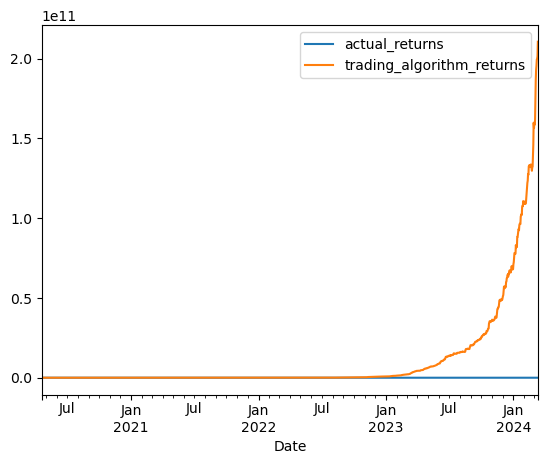

In [37]:
# Calculate and plot the cumulative returns for the `actual_returns` and the `trading_algorithm_returns`
(1 + predictions_df[["actual_returns", "trading_algorithm_returns"]]).cumprod().plot()

# Save the plot as a PNG file
plt.savefig('actual_vs_algo.png')